# Stock Prize Prediction Using LSTM Model
## by- Tamal Majumder
* **[LINKEDIN](https://www.linkedin.com/in/tamal-majumder-4979781a3/)**
* **[GITHUB](https://github.com/t-majumder)**
* **First we load the dataset we downloaded: [Dataset Link](https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv)**
* Copy the data and paste it in an excel file and save it as .csv file
## Explanation:
* First we load the Dataset in python.
* Then We sepaeate the closing Values of the share and assign each with a index. and simply plot the graph to look at the fluctuation. From the graph we get the insight over time the prize of its share is decreasing.
* Finally Converted the image to a Pencil Sketch
#### Preprocessing:
* In this Step we Normalize the dataset and convert the share Values between 0 to 1 for training and testing the dataset.
#### Preprocessing:
* After the data is scaleed we train the data and test the data using the last 25% data that we stored in a another set using initial dataset.
* Then we create stack LSTM model 
* After creating the model we train th emodel using our dataset 100 times for more precise prediction and better accuracy.
* Then we look at root mean squared error values
#### Visual Understanding:
* Finally we plot the graph for visual understanding of the data and how well our model is able to predict the data. 
* In the plotted curves we can see that the Trained Model almost accurately overlapes on the Real Dataset curve and the untrained Test Data is also fitting the curve quiet well . So in conclusion we can say that our model is quiet Successfully predicting the stock prizes.  
* Finally We plot last 100 days and Next 30 days stock prize. Also the Continuous 100+30 days curve . 

In [37]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [39]:
df = pd.read_csv('D:\\Data science and ml projects\\2.Stock prize prediction\\Stock prize prediction.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,NaN
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,NaN
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,NaN
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,NaN
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,NaN
...,...,...,...,...,...,...,...,...,...
2030,7/27/2010,117.60,119.50,112.00,118.80,118.65,586100,694.98,NaN
2031,7/26/2010,120.10,121.00,117.10,117.10,117.60,658440,780.01,NaN
2032,7/23/2010,121.80,121.95,120.25,120.35,120.65,281312,340.31,NaN
2033,7/22/2010,120.30,122.00,120.25,120.75,120.90,293312,355.17,NaN


In [40]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,NaN
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,NaN
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,NaN
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,NaN
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,NaN


In [41]:
df = df.reset_index()['Close']
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [42]:
df.isnull().sum()

0

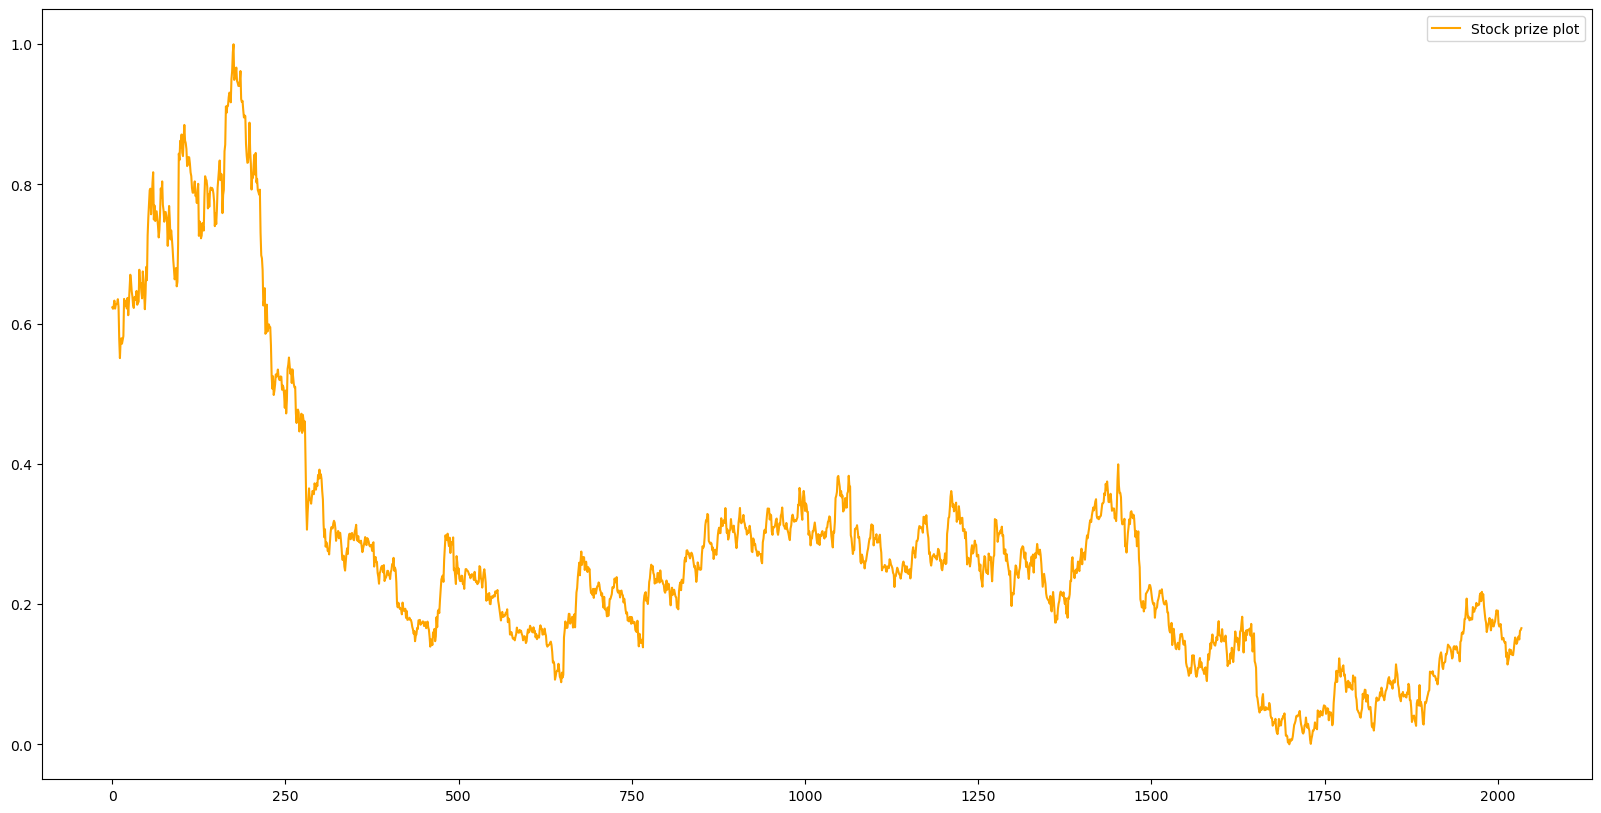

In [94]:
plt.figure(figsize=(20,10))
plt.plot(df,color='orange',label='Stock prize plot')
plt.legend()

## Preprocessing The Dataset

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


## Defining time step and creating training and test datasets according to that time step

In [46]:
training_size = int(len(df)*0.75)
test_size=int(len(df)) - training_size
train_data, test_data = df[0:training_size, :], df[training_size:len(df), :1]

In [47]:
def create_features(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [48]:
ts = 100
X_train, y_train = create_features(train_data, ts)
X_test, y_test = create_features(test_data, ts)

In [49]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Creating the LSTM model

In [50]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 13s 262ms/step - loss: 0.0300 - val_loss: 0.0060
Epoch 2/100
23/23 [==============================] - 5s 233ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 3/100
23/23 [==============================] - 5s 233ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 4/100
23/23 [==============================] - 5s 232ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 5/100
23/23 [==============================] - 5s 235ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 6/100
23/23 [==============================] - 5s 236ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 7/100
23/23 [==============================] - 5s 236ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 8/100
23/23 [==============================] - 5s 236ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 5s 239ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/100
23/23 [==============================] - 5s 238ms/step - loss: 0.0011 - val_l

In [52]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [53]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## Calculating Root Mean Square Error

In [54]:
math.sqrt(mean_squared_error(y_train,train_predict))

161.97128139833129

In [55]:
math.sqrt(mean_squared_error(y_test,test_predict))

104.78200853559612

## Plotting the graph according to train and test data

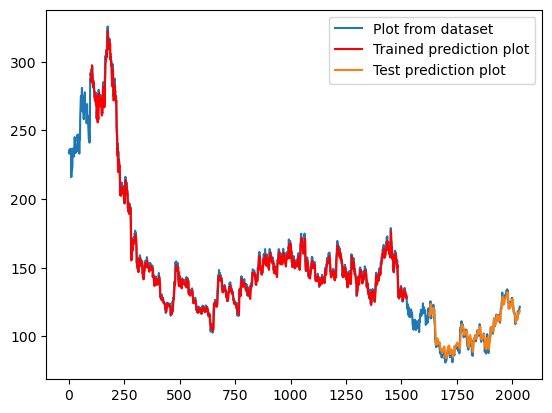

In [60]:
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df),label='Plot from dataset')
plt.plot(trainPredictPlot,'r',label='Trained prediction plot')

plt.plot(testPredictPlot,label='Test prediction plot')
plt.legend()
plt.show()

In [61]:
len(test_data)

509

In [62]:
x_input=test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [63]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [64]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16149674]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [65]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(df)

2035

## This is the graph of actual values in last 100 days

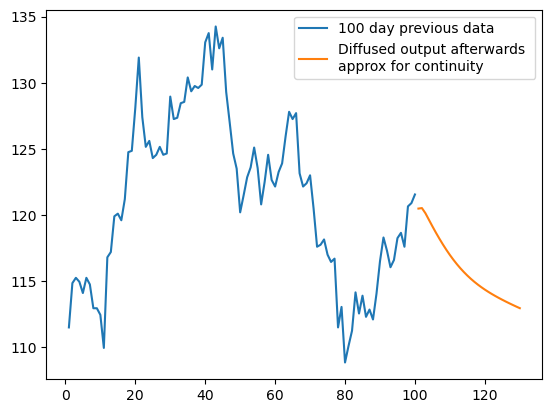

In [81]:
plt.plot(day_new,scaler.inverse_transform(df[1935:]),label='100 day previous data')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='Diffused output afterwards \napprox for continuity')
plt.legend()

## This is the graph of predicted values for next 30 days

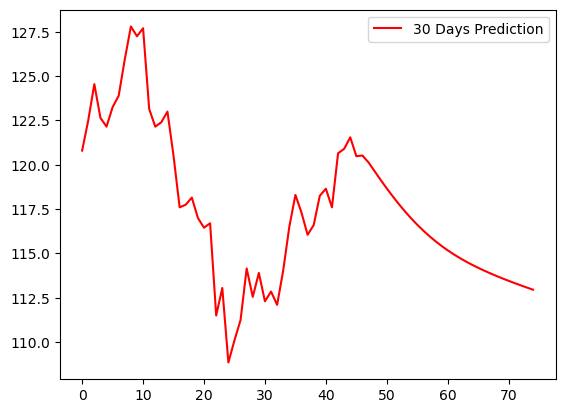

In [83]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(scaler.inverse_transform(df1[1990:]),color='red',label='30 Days Prediction')
plt.legend()

## Merged Graph of 130 Days

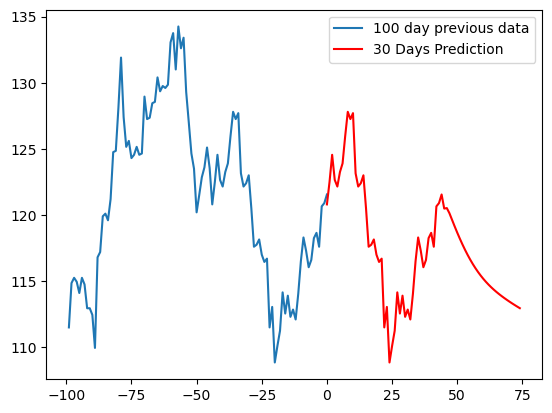

In [91]:
plt.plot(day_new-100,scaler.inverse_transform(df[1935:]),label='100 day previous data')
plt.plot(scaler.inverse_transform(df1[1990:]),color='red',label='30 Days Prediction')
plt.legend()